Importing The Necessary Libraries

In [31]:
import numpy as np 
import pandas as pd 

import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

Pre-Processing the Images for Training

In [8]:
Image_features= []
Labels= []

for i in tqdm(glob('train/Open_Eyes/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    Image_features.append(temp)
    Labels.append(1)
    
for i in tqdm(glob('train/Closed_Eyes/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    Image_features.append(temp)
    Labels.append(0)    
    

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:02<00:00, 991.99it/s] 


In [9]:
Image_features
#Image_properties[0]
#Image_properties[0].shape

[array([[38, 42, 46, ..., 89, 90, 90],
        [37, 42, 46, ..., 91, 90, 90],
        [37, 43, 46, ..., 93, 92, 91],
        ...,
        [48, 52, 57, ..., 71, 72, 74],
        [49, 51, 56, ..., 70, 70, 72],
        [49, 51, 56, ..., 70, 70, 70]], dtype=uint8),
 array([[87, 87, 88, ..., 49, 47, 45],
        [84, 86, 88, ..., 47, 47, 46],
        [85, 85, 85, ..., 45, 48, 45],
        ...,
        [67, 65, 64, ..., 62, 62, 62],
        [66, 65, 63, ..., 60, 62, 59],
        [68, 65, 65, ..., 61, 62, 58]], dtype=uint8),
 array([[39, 43, 47, ..., 87, 89, 91],
        [41, 44, 46, ..., 91, 92, 92],
        [40, 43, 46, ..., 97, 91, 92],
        ...,
        [50, 53, 57, ..., 71, 73, 74],
        [50, 52, 55, ..., 71, 73, 75],
        [50, 52, 58, ..., 71, 73, 74]], dtype=uint8),
 array([[93, 94, 93, ..., 50, 49, 47],
        [92, 94, 94, ..., 49, 49, 48],
        [91, 95, 97, ..., 49, 47, 46],
        ...,
        [64, 67, 66, ..., 63, 63, 60],
        [63, 66, 65, ..., 62, 61, 60],
      

In [4]:
Labels
#print(Labels.count(1))
#print(Labels.count(0))

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


Scaling The Image Features

In [10]:
Image_features= (np.array(Image_features) - np.min(Image_features)) / (np.max(Image_features))
Image_features= Image_features/255.0
Labels = (np.array(Labels) - np.min(Labels)) / (np.max(Labels) - np.min(Labels))


In [11]:
Image_features

array([[[0.00058439, 0.00064591, 0.00070742, ..., 0.0013687 ,
         0.00138408, 0.00138408],
        [0.00056901, 0.00064591, 0.00070742, ..., 0.00139946,
         0.00138408, 0.00138408],
        [0.00056901, 0.00066128, 0.00070742, ..., 0.00143022,
         0.00141484, 0.00139946],
        ...,
        [0.00073818, 0.00079969, 0.00087659, ..., 0.00109189,
         0.00110727, 0.00113802],
        [0.00075356, 0.00078431, 0.00086121, ..., 0.00107651,
         0.00107651, 0.00110727],
        [0.00075356, 0.00078431, 0.00086121, ..., 0.00107651,
         0.00107651, 0.00107651]],

       [[0.00133795, 0.00133795, 0.00135333, ..., 0.00075356,
         0.0007228 , 0.00069204],
        [0.00129181, 0.00132257, 0.00135333, ..., 0.0007228 ,
         0.0007228 , 0.00070742],
        [0.00130719, 0.00130719, 0.00130719, ..., 0.00069204,
         0.00073818, 0.00069204],
        ...,
        [0.00103037, 0.00099962, 0.00098424, ..., 0.00095348,
         0.00095348, 0.00095348],
        [0.0

In [7]:
Labels

array([1., 1., 1., ..., 0., 0., 0.])

In [12]:
Image_features= np.expand_dims(Image_features,-1)


In [14]:
Image_features[0].shape

(64, 64, 1)

Spliting Data for Training and Testing

In [15]:

x_train, x_test, y_train, y_test = train_test_split(Image_features, Labels, test_size=0.8, random_state=42)


Model Training

In [1]:

model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])


NameError: name 'tf' is not defined

In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])


In [36]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel.keras',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)

model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=callback)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 1.0000 - loss: 0.0035
Epoch 1: val_loss improved from inf to 0.51652, saving model to bestModel.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 631ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.7125 - val_loss: 0.5165
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 1.0000 - loss: 0.0025
Epoch 2: val_loss did not improve from 0.51652
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 604ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.6125 - val_loss: 0.6785
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 1.0000 - loss: 8.7254e-04
Epoch 3: val_loss improved from 0.51652 to 0.11398, saving model to bestModel.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 689ms/step - accuracy: 1.0000 - loss: 8.8406e-04 - val_accuracy: 0.9563 - val_loss: 0.1140
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 1.0000 - loss: 0.0013
Epoch 4: val_loss improved from 0.11398 to 0.08901, saving model to bestModel.keras

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 56, 56, 32)     │        25,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     2,359,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 84)             │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 84)             │           336 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,457,569 (28.45 MB)

 Trainable params: 2,485,565 (9.48 MB)

 Non-trainable params: 872 (3.41 KB)

 Optimizer params: 4,971,132 (18.96 MB)

Model Evaluation

In [38]:
model.evaluate(x_test, y_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 158ms/step - accuracy: 0.9447 - loss: 0.1833


[0.19866175949573517, 0.9424999952316284]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


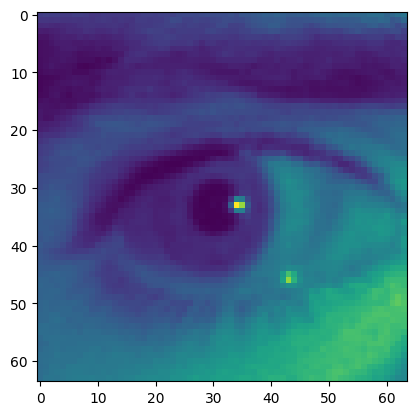

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


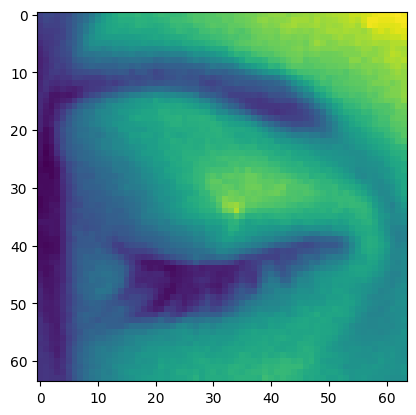

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


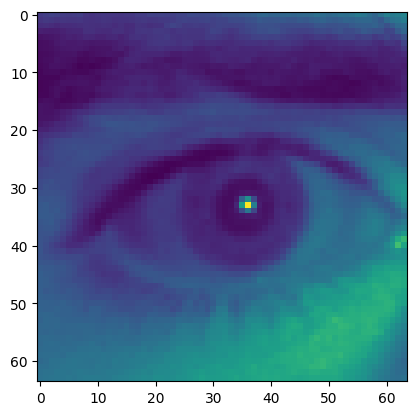

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


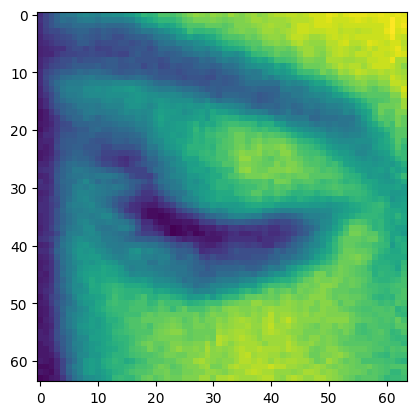

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


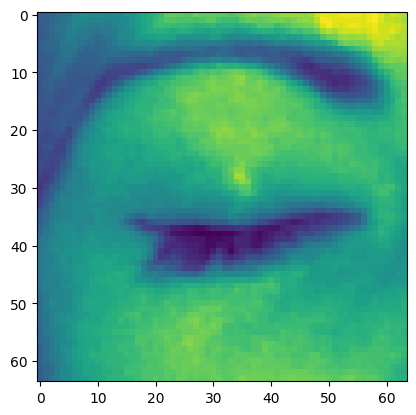

Closed


In [39]:
for i in x_test[0:5]:
    result = model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print("Closed")

Confusion Matrix

100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step


Text(0.5, 25.722222222222214, 'Actual')

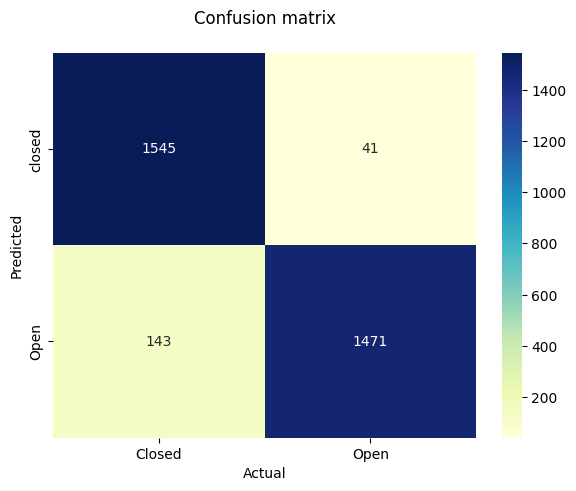

In [40]:
plt.figure(figsize=(15, 5))

preds = model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

In [41]:
accuracy = model.evaluate(x_test, y_test)[1]
print("Accuracy:", accuracy)

100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.9447 - loss: 0.1833
Accuracy: 0.9424999952316284
